# Trajectory inference on synthetic hematopoiesis data

Data was generated using the notebook : `early_hematopoiesis_unreachable_pEr.ipynb`

In [1]:
import pandas as pd
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
%pwd

'/data/trajectory_reconstruction'

In [4]:
%ls ../synthetic_data/

_tests/
branching_synthetic_core_regulation1_2022-04-11_14h33m15.tsv
branching_synthetic_core_regulation2_2022-04-11_14h57m51.tsv
metadata_core_regulation1_2022-04-11_14h33m15.tsv
metadata_core_regulation2_2022-04-11_14h57m51.tsv


#### Read in data

In [5]:
in_file = '../synthetic_data/branching_synthetic_hematopoiesis_2022-03-15_14h51m06.tsv'

adata = st.read(
    file_name=in_file,
    workdir='./stream_branching'
)
df = pd.read_csv(
    in_file, sep="\t", index_col=0, header=0
)
df.head(6)

Saving results in: ./stream_branching


common_obs0  common_obs1  common_obs2  common_obs3  common_obs4  \
Egr1       3.892874     1.248786     3.057174     0.836229     1.937875   
Junb       2.827419     0.635362     4.433269     3.739484     0.197981   
Bclaf1     6.331990     4.175486     7.321811     8.233393     7.183585   
Myc        3.724108     2.481673     2.307164     3.427367     4.728801   
Fli1       6.763577     0.000000     8.009872     8.388200     7.437731   
Gata2      8.640213     9.097248     8.651710     8.296929     6.667967   

        common_obs5  common_obs6  common_obs7  common_obs8  common_obs9  ...  \
Egr1       4.492096     1.563765     3.994645     1.160276     5.187002  ...   
Junb       4.238321     2.607564     4.049231     1.823819     2.416939  ...   
Bclaf1     5.610533     7.068787     6.694442     9.410022     5.145443  ...   
Myc        1.657739     5.357338     2.450891     1.894859     3.808074  ...   
Fli1       8.299299     6.610561     8.141237     7.533457     8.852061  ...   
Gata2      7.029962     8.122541     7.961066     7.009656     8.751922  ...   

        attractor_pNeumast_obs6590  attractor_pNeumast_obs6591  \
Egr1                      2.882846                    4.231490   
Junb                      1.496574                    2.504438   
Bclaf1                    2.405031                    3.665016   
Myc                       3.486402                    4.463519   
Fli1                      3.172963                    3.402430   
Gata2                     0.527852                    3.226707   

        attractor_pNeumast_obs6592  attractor_pNeumast_obs6593  \
Egr1                      0.493861                    2.855855   
Junb                      0.757430                    3.479759   
Bclaf1                    1.343585                    1.857772   
Myc                       2.633811                    6.811802   
Fli1                      2.169679                    2.282418   
Gata2                     3.615809                    2.097719   

        attractor_pNeumast_obs6594  attractor_pNeumast_obs6595  \
Egr1                      3.550875                    2.617055   
Junb                      3.225254                    3.678192   
Bclaf1                    2.689413                    2.766141   
Myc                       3.599950                    5.187492   
Fli1                      3.644640                    2.323859   
Gata2                     2.390920                    0.581845   

        attractor_pNeumast_obs6596  attractor_pNeumast_obs6597  \
Egr1                      3.933274                    0.371583   
Junb                      2.285248                    4.498643   
Bclaf1                    2.649941                    3.144946   
Myc                       1.688123                    3.129111   
Fli1                      5.739683                    2.173071   
Gata2                     3.885320                    1.905362   

        attractor_pNeumast_obs6598  attractor_pNeumast_obs6599  
Egr1                      0.000000                    2.630966  
Junb                      2.840908                    3.052932  
Bclaf1                    2.154913                    0.000000  
Myc                       4.438210                    1.823557  
Fli1                      2.241293                    3.347630  
Gata2                     3.065918                    3.340198  

[6 rows x 6600 columns]

> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

#### Read in metadata

In [6]:
st.add_metadata(
    adata, 
    file_name='../synthetic_data/metadata_hematopoiesis_2022-03-15_14h51m06.tsv'
)
adata.obs.head()

label label_color
common_obs0  common     #FE7B8B
common_obs1  common     #FE7B8B
common_obs2  common     #FE7B8B
common_obs3  common     #FE7B8B
common_obs4  common     #FE7B8B

#### Calculate QC

In [7]:
st.cal_qc(adata,assay='rna')

The following figures were retrieved from the following bioRxiv preprint:

```Hérault, L. et al. (2022). Single-cell RNA-seq assisted synthesis of a Boolean network to model early hematopoiesis aging.```
Doi : https://doi.org/10.1101/2022.02.08.479548

## Overview of the differentiation graph

It includes the states of interest `iHSC`, `preDiff`, `pNeumast`, `pMk`.
Note that the transition towards `pEr` is defined by a transitory state (under Most Permissive Semantics) as discussed by Paulevé et al. in https://doi.org/10.1038/s41467-020-18112-5 . After exhaustive search on the transition graph of the given Boolean Network, it was found that **this state is unreachable** under Fully Asynchronous semantics. This is the reason why it is not included in this analysis.

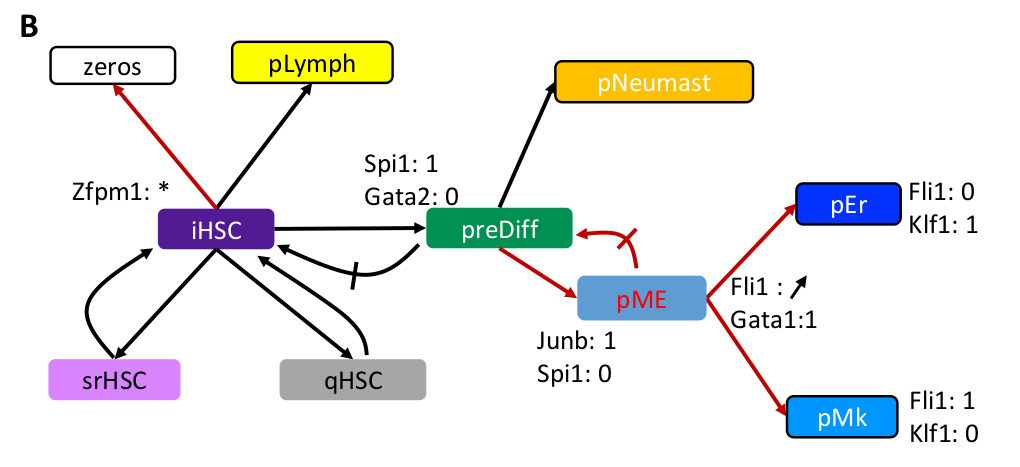

## Specification of the Boolean configuration of each state

To better clafify the boolean states of the previous differentiation graph, here is a colourmap specifying each gene's Boolean value, accross different states.

* Entries in <span style="color:blue">blue</span> are set to <span style="color:blue">false</span>.
* Entries in <span style="color:red">red</span> are set to <span style="color:red">true</span>.
* Entries in <span style="color:gray">gray/white</span> are free, i.e. they can be interpreted as either <span style="color:red">true</span> or <span style="color:blue">false</span>.


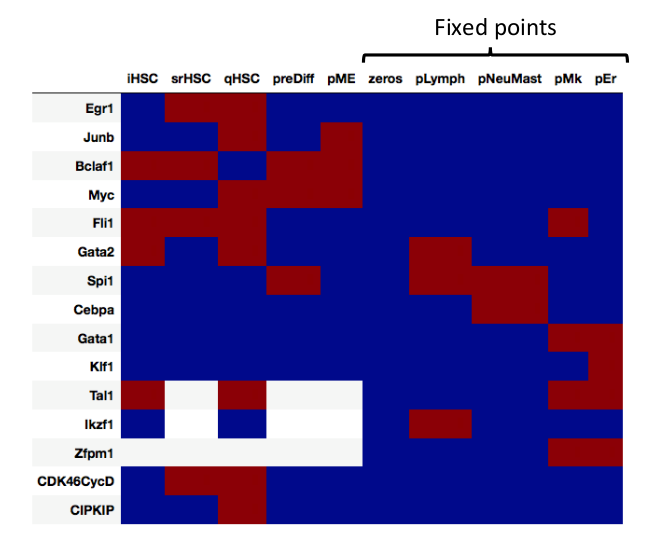

In [8]:
st.filter_cells(adata,min_n_features= 13)
st.filter_features(adata,min_n_cells = 1000)

filter cells based on min_n_features
after filtering out low-quality cells: 
5464 cells, 15 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
5464 cells, 15 genes


Commented out because our simulated data is already lib_size normalised and log2 transformed
```python
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
```

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

12 variable genes are selected


Index(['Cebpa', 'Ikzf1', 'Gata2', 'Fli1', 'CDK46CycD', 'CIPKIP', 'Bclaf1',
       'Tal1', 'Junb', 'Zfpm1', 'Gata1', 'Myc'],
      dtype='object')

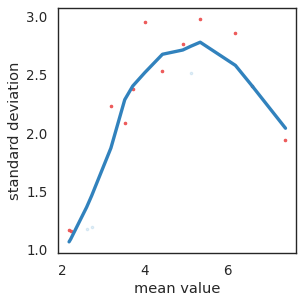

In [9]:
st.select_variable_genes(adata,loess_frac=0.5,n_genes=12)
adata.uns["var_genes"]

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [10]:
st.dimension_reduction(
    adata,
    method='se',
    feature='var_genes',
    n_components=2,
    n_neighbors=15,
    n_jobs=12
)

feature var_genes is being used ...
12 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

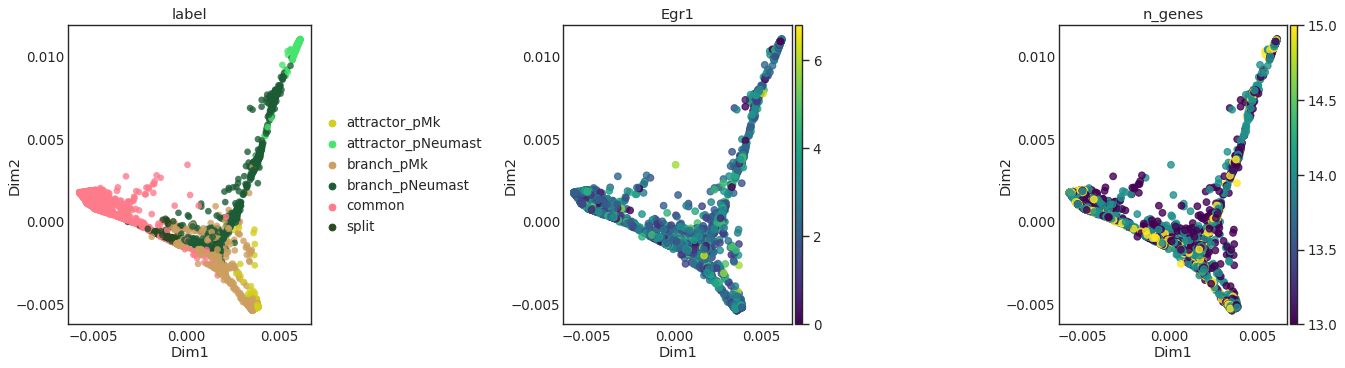

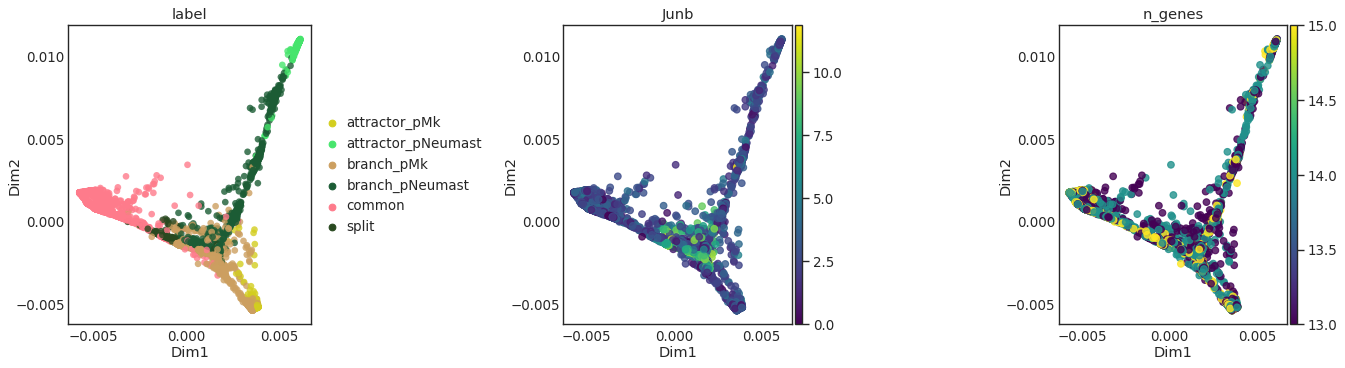

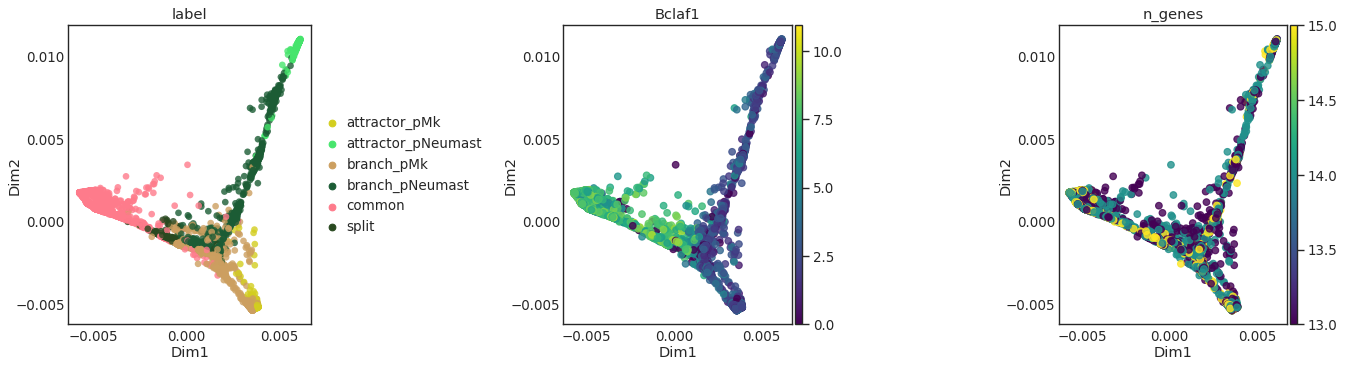

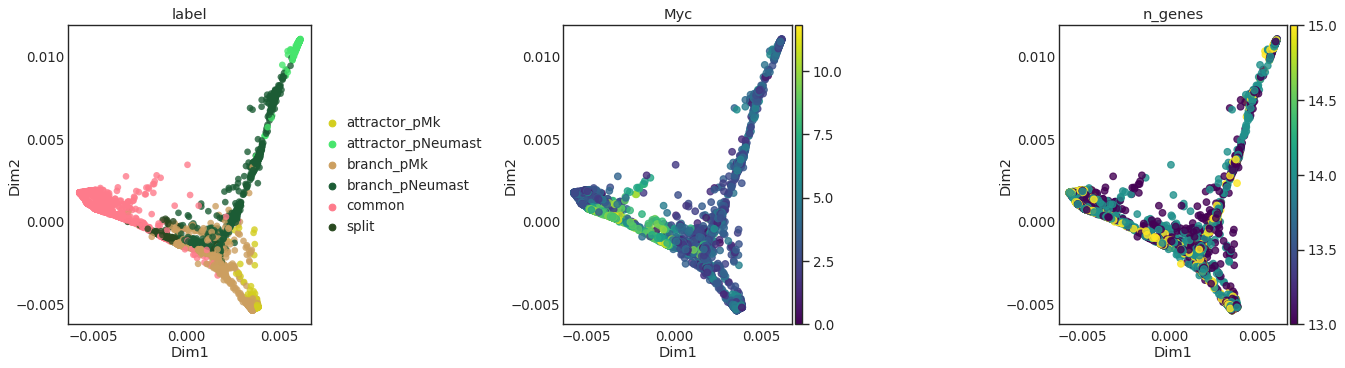

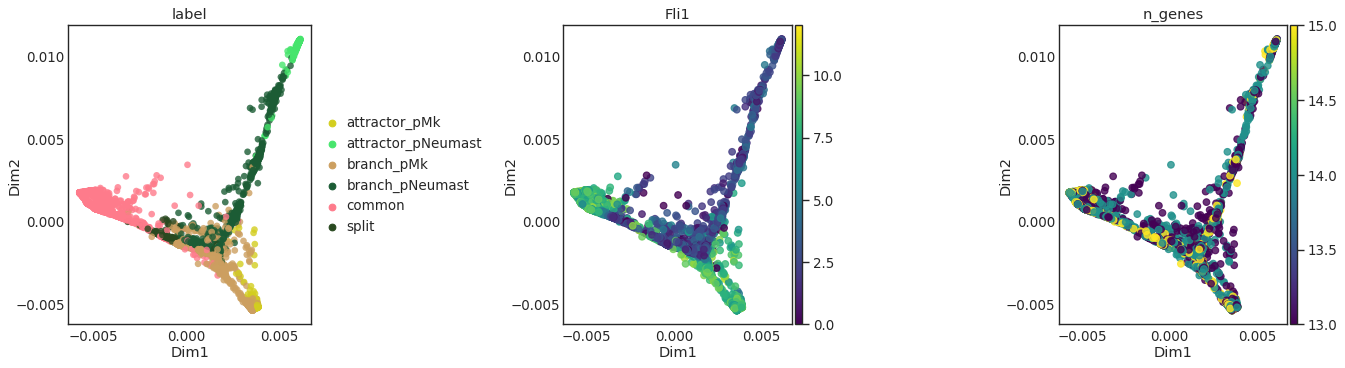

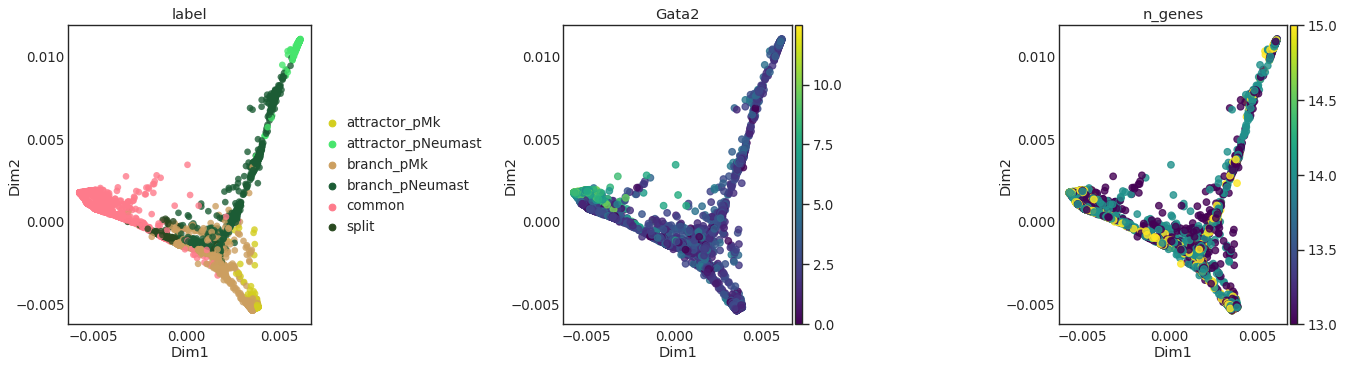

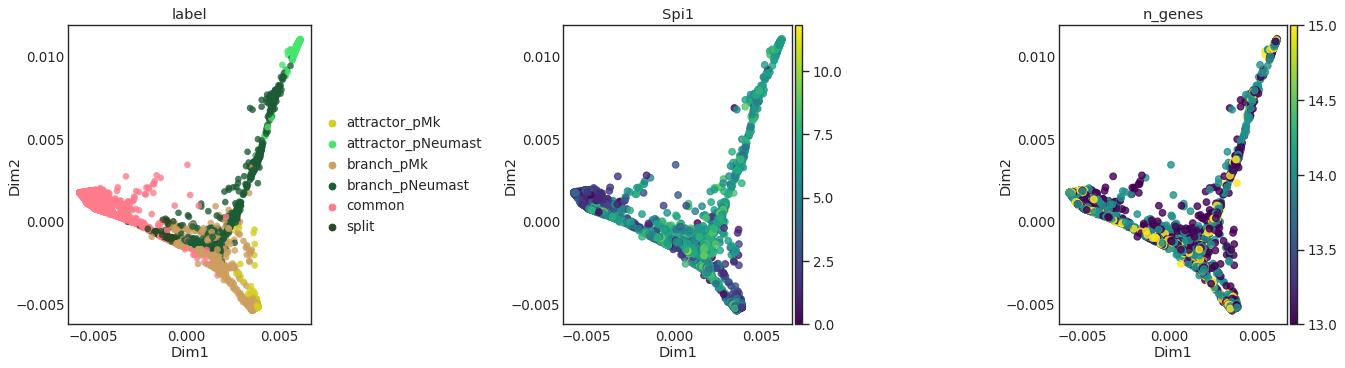

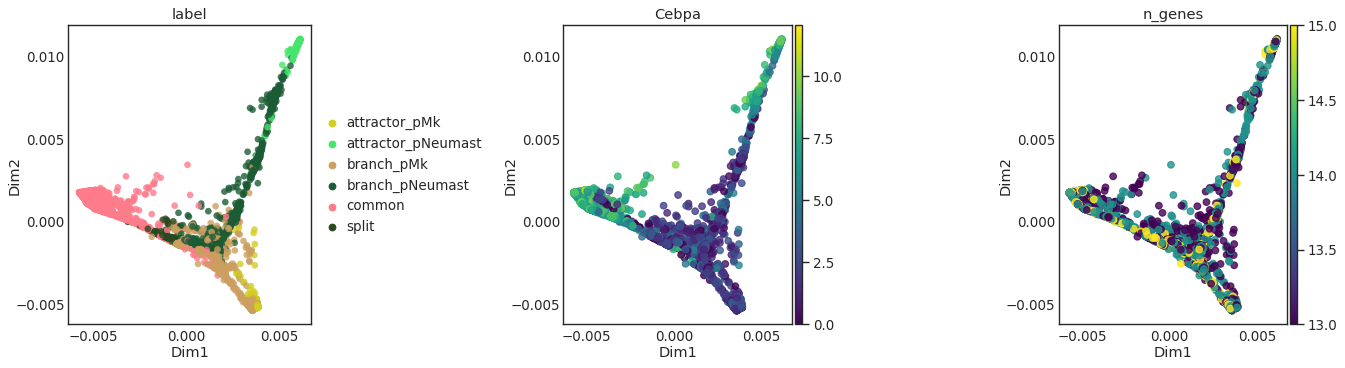

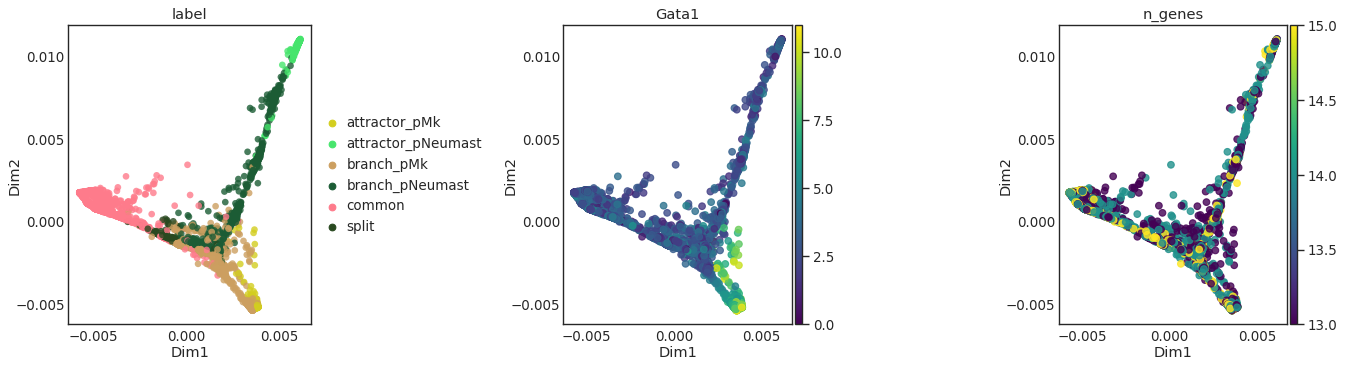

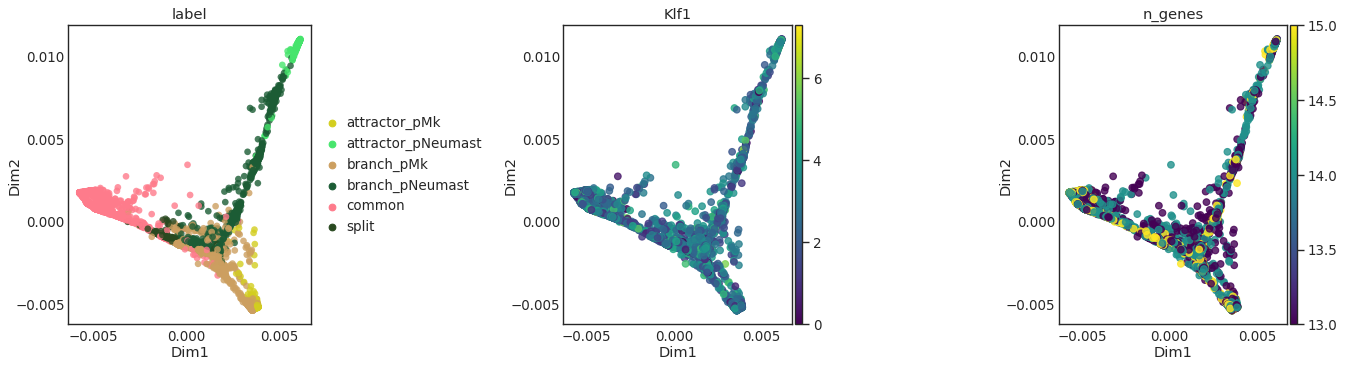

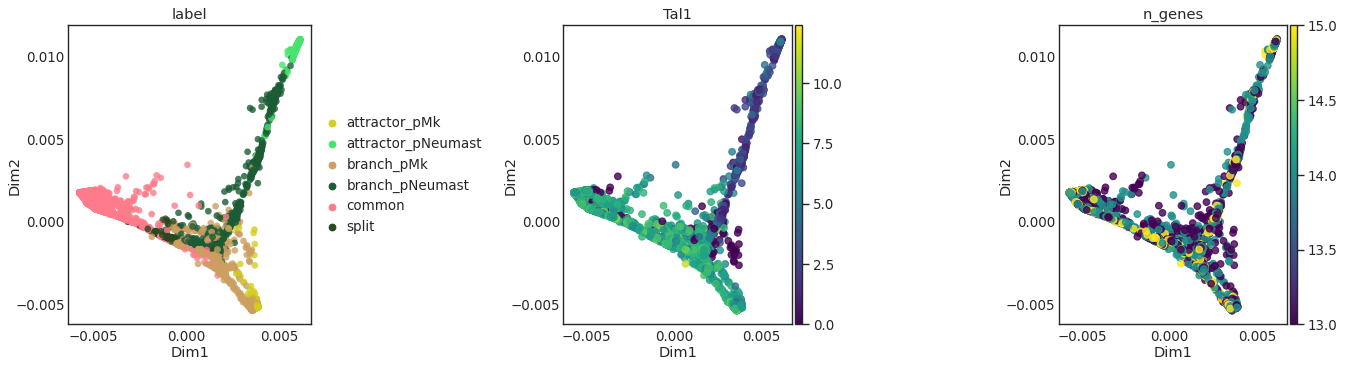

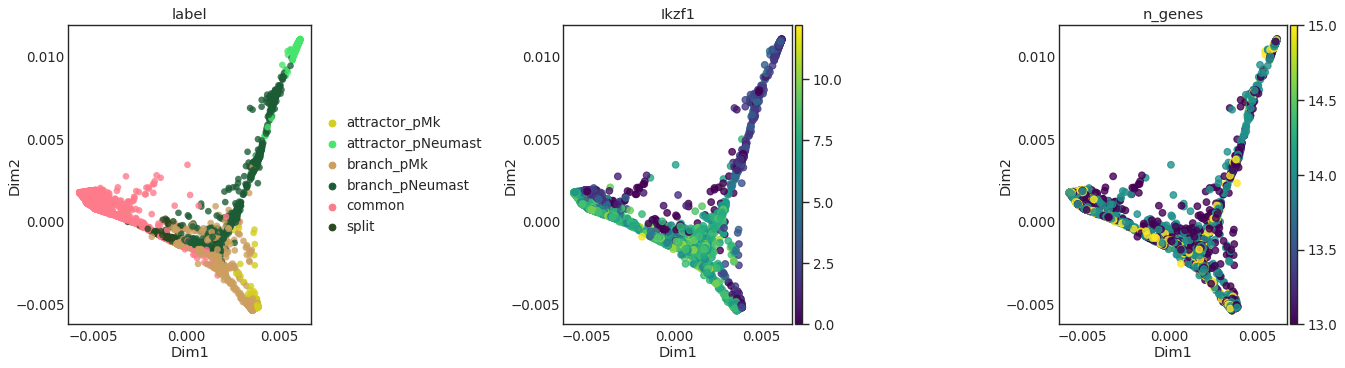

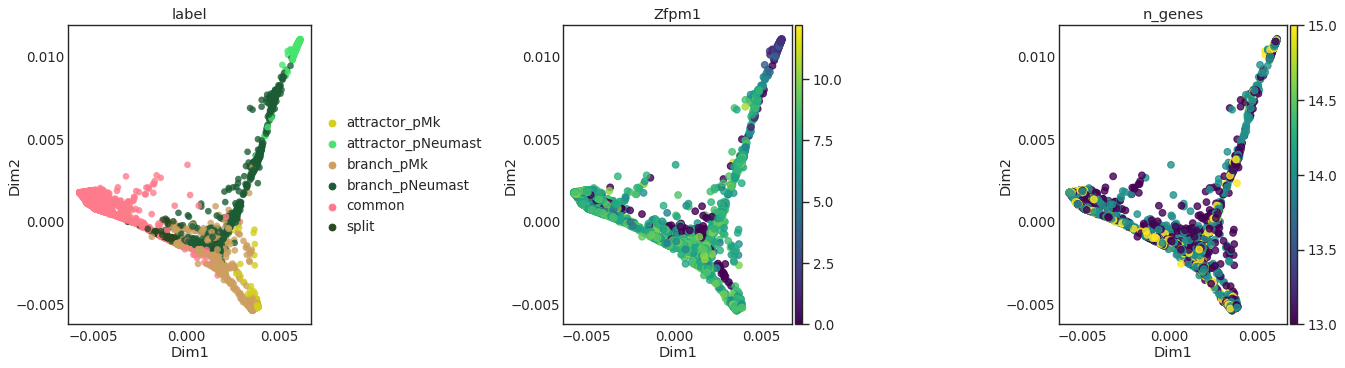

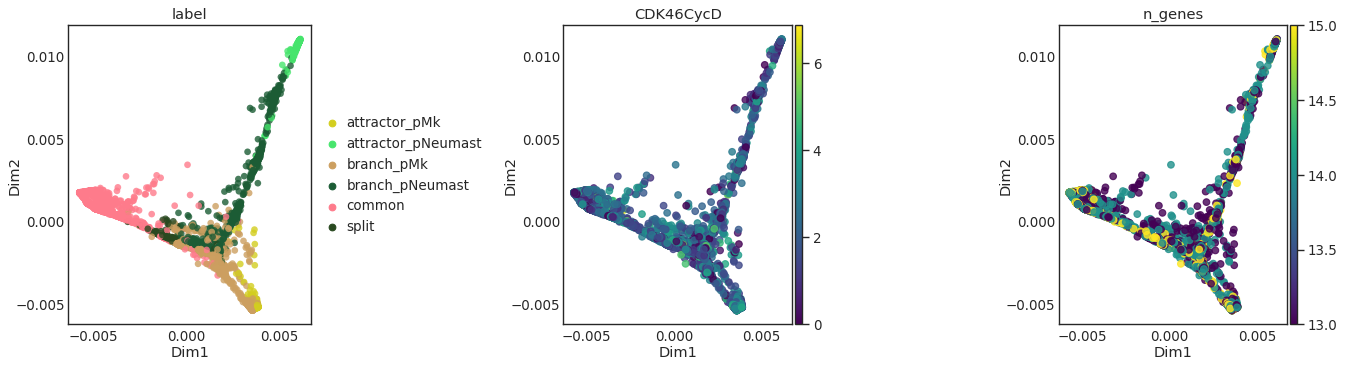

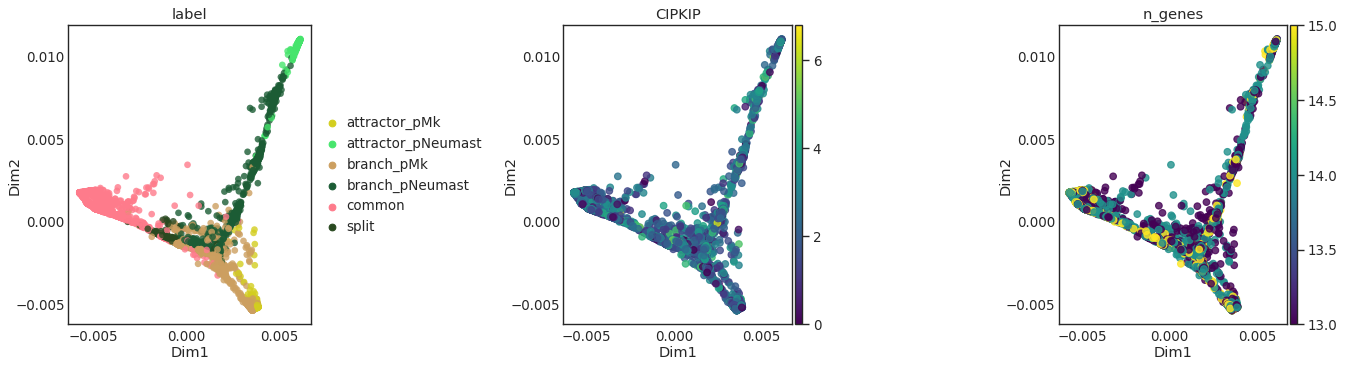

In [11]:
for gene in df.index:
    st.plot_dimension_reduction(adata,color=['label',gene,'n_genes'],
                            n_components=2,show_graph=False,show_text=False)

#### Trajectory inference

In [12]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


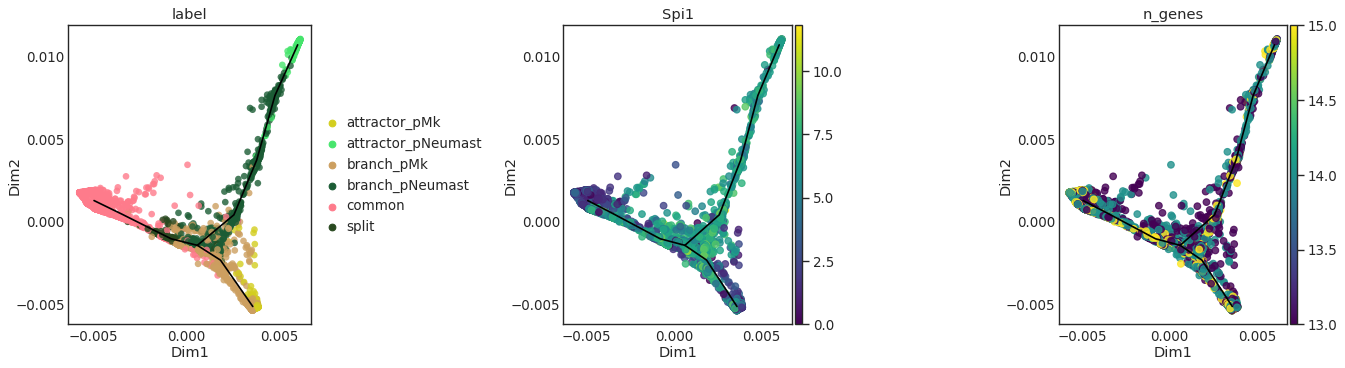

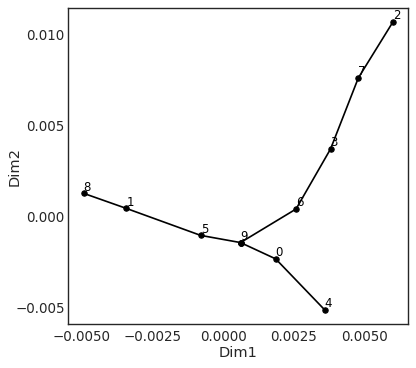

In [13]:
st.plot_dimension_reduction(adata,color=['label','Spi1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [14]:
st.elastic_principal_graph(adata,epg_alpha=0.07,epg_mu=0.07,epg_lambda=0.03)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 5464 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
5.315e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
1.313e-07
	
1.172e-07
	
0.9949
	
0.9955
	
3.757e-07
	
2.445e-08
	
1.223e-06
	
6.114e-05
	
0


22.66 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


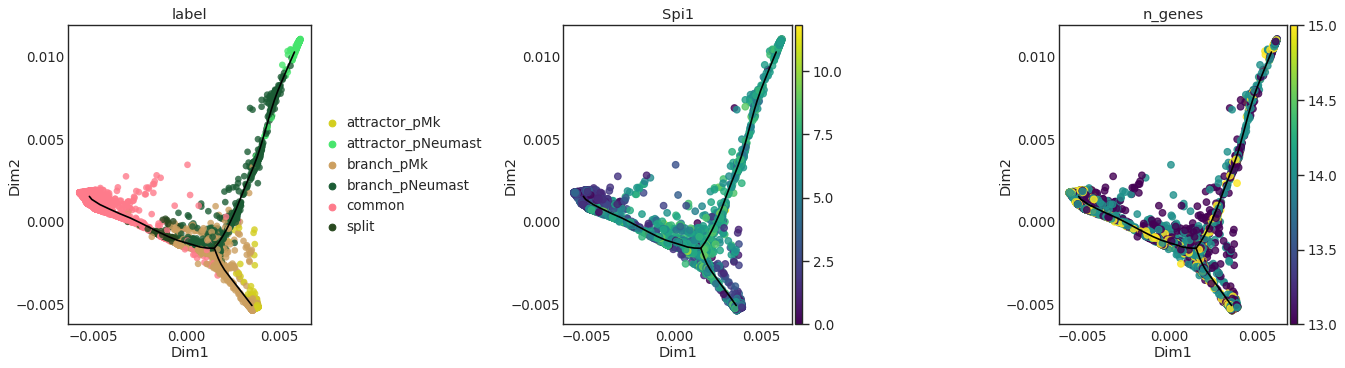

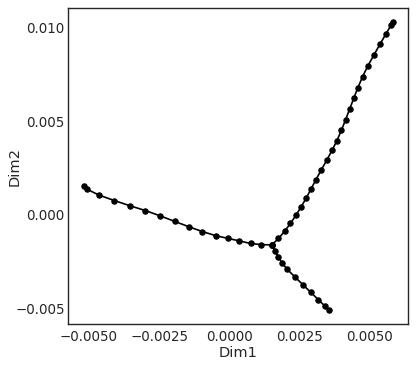

In [15]:
st.plot_dimension_reduction(adata,color=['label','Spi1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


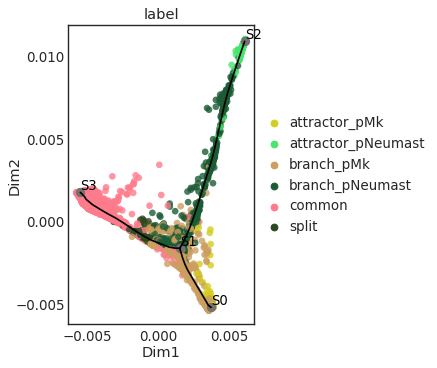

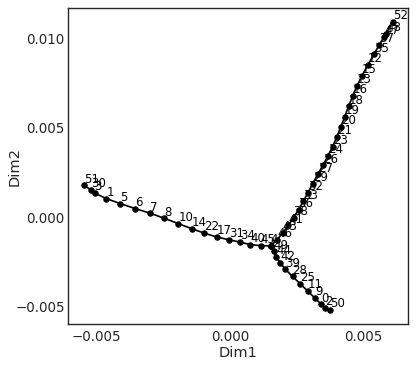

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

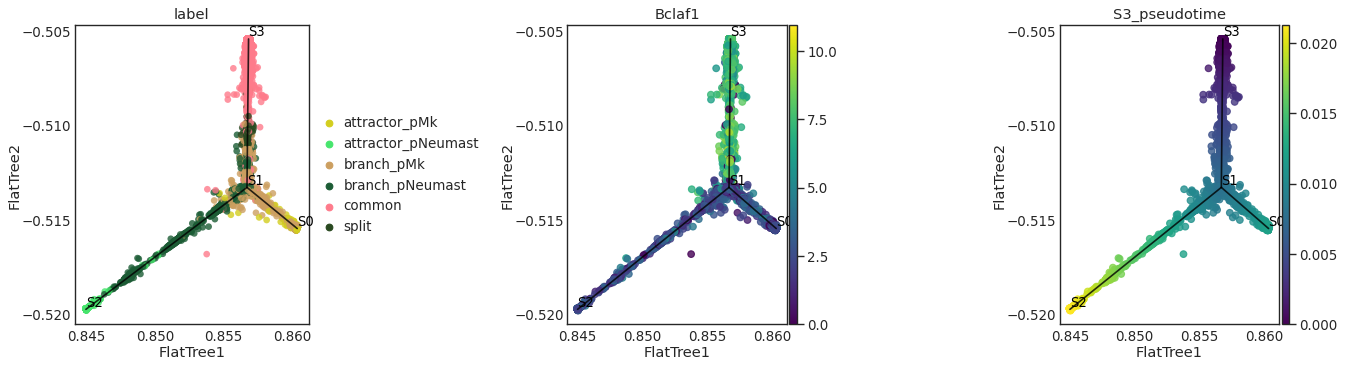

In [17]:
st.plot_flat_tree(adata,color=['label', 'Bclaf1','S3_pseudotime'],
                dist_scale=0.5,show_graph=True,show_text=True)

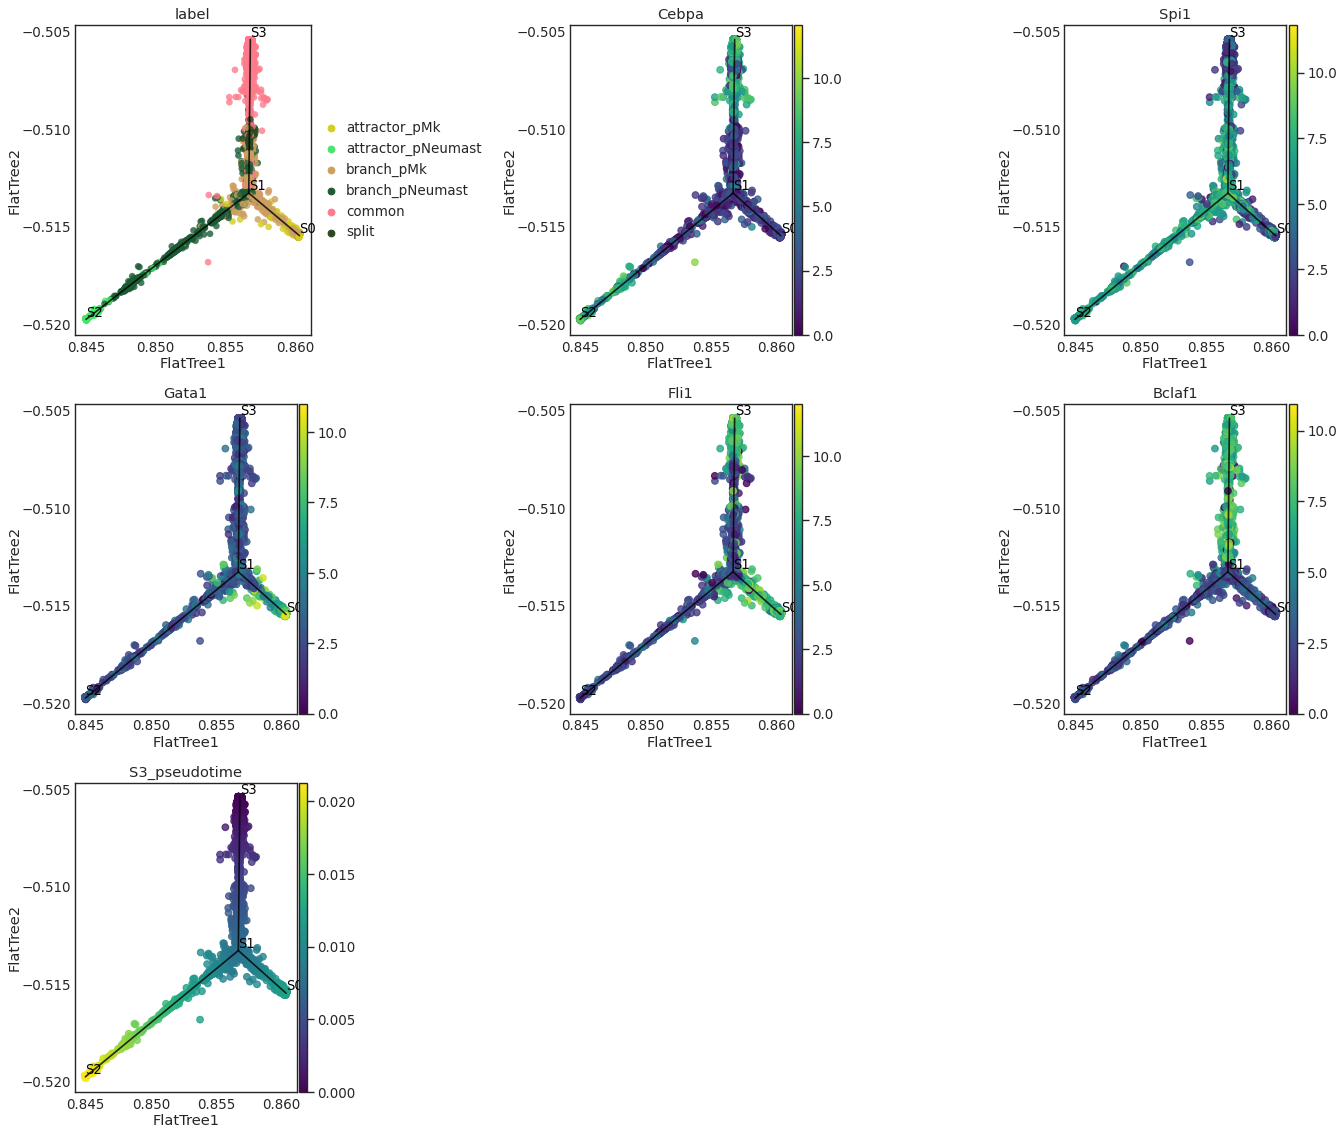

In [18]:
st.plot_flat_tree(adata,color=['label','Cebpa', 'Spi1', 'Gata1', 'Fli1', 'Bclaf1','S3_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

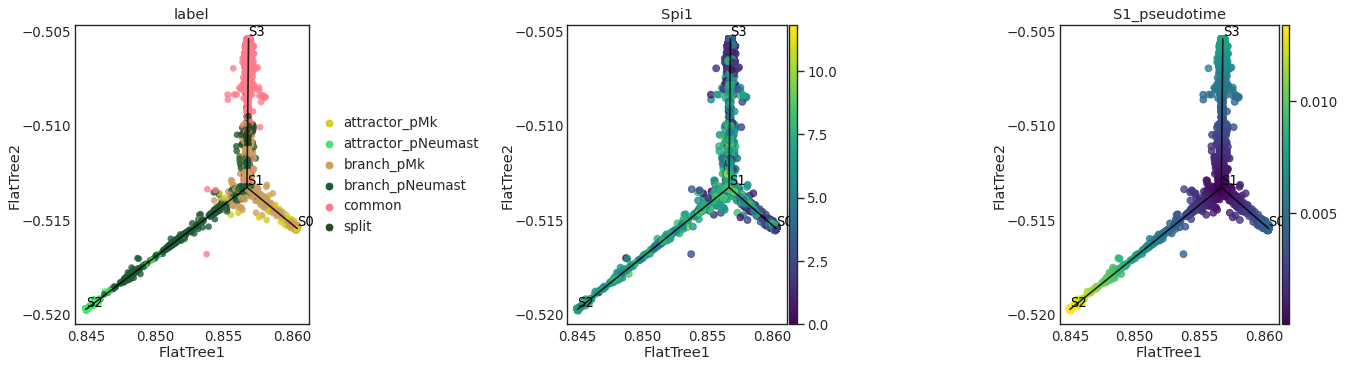

In [19]:
st.plot_flat_tree(adata,color=['label','Spi1','S1_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

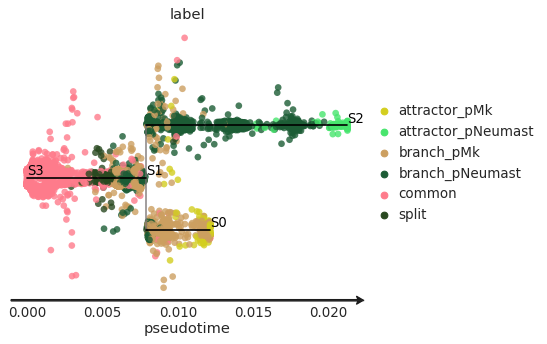

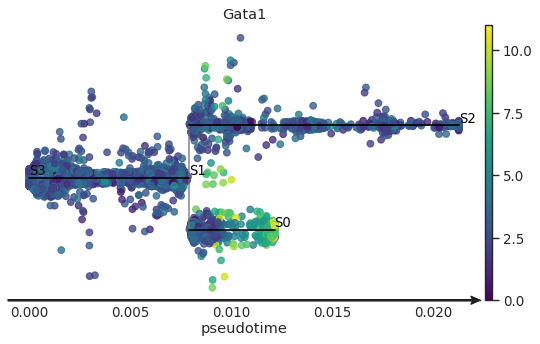

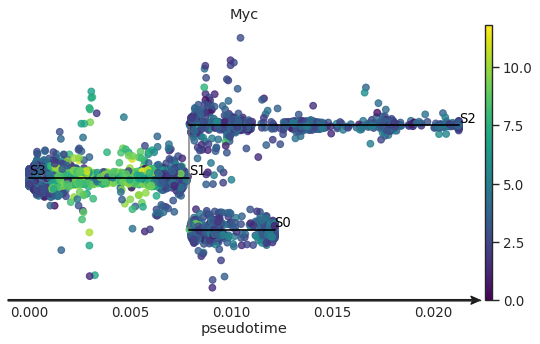

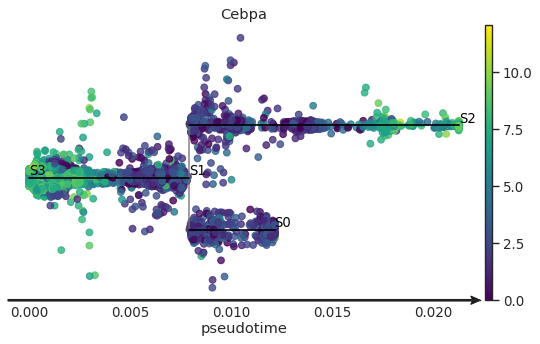

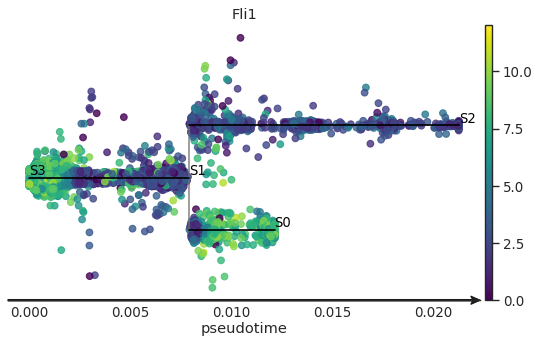

In [20]:
st.plot_stream_sc(adata,root='S3',color=['label', 'Gata1', 'Myc', 'Cebpa', 'Fli1'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

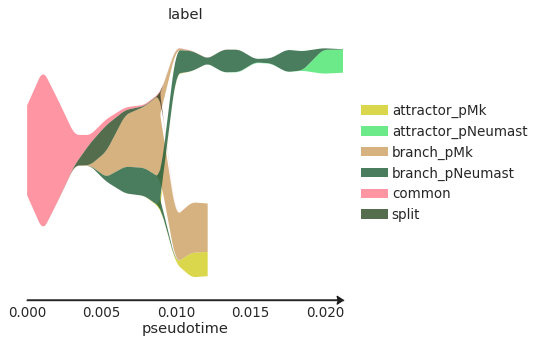

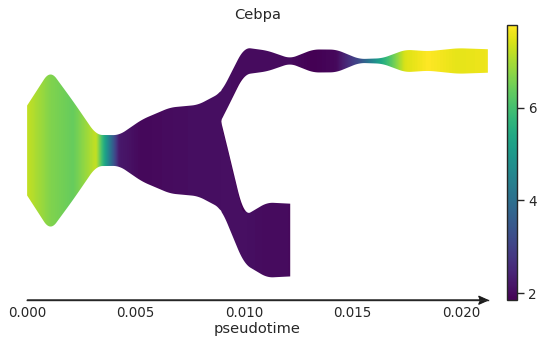

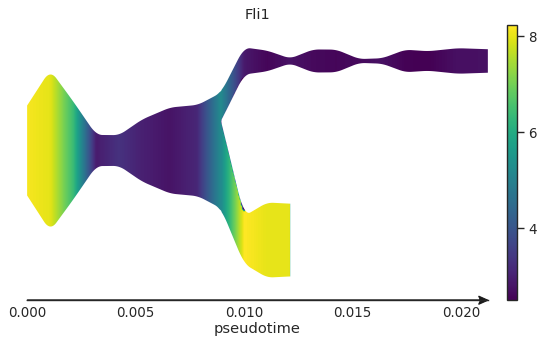

In [21]:
st.plot_stream(adata,root='S3',color=['label','Cebpa', 'Fli1'])

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

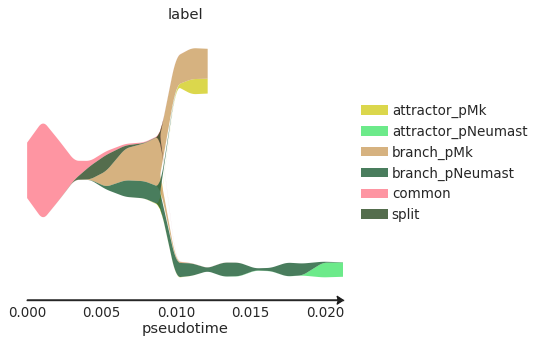

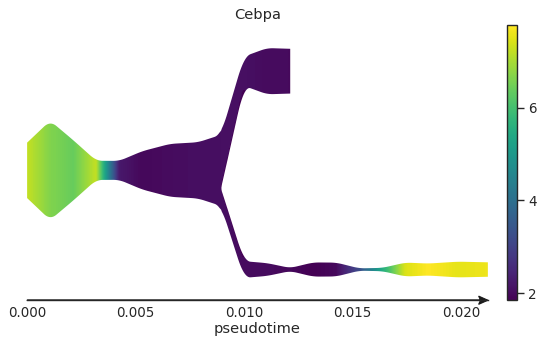

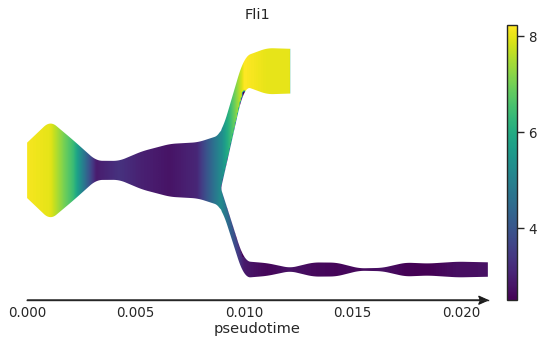

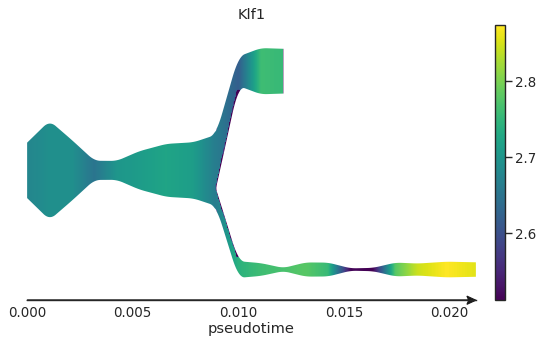

In [22]:
st.plot_stream(adata,root='S3',color=['label','Cebpa', 'Fli1', 'Klf1'],dist_scale=0.5,factor_num_win=1.5,preference=['S0'])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [23]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S3',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
12 markers are being scanned ...


In [24]:
adata.uns['leaf_markers_all'].head()

zscore H_statistic      H_pvalue  S3S1_pvalue   S1S2_pvalue  \
Bclaf1  1.41394     3888.18             0            1             0   
Tal1   -1.41417     1865.03             0            0             1   
Fli1      1.043      1210.6  1.32506e-263  1.11758e-48  5.62948e-291   
Myc     1.41394     858.281  4.23251e-187            1  3.69493e-131   
Cebpa   1.01959     753.558  2.32781e-164            1   5.96427e-15   

         S1S0_pvalue  
Bclaf1             0  
Tal1               0  
Fli1               1  
Myc     7.14857e-147  
Cebpa   2.58257e-177

In [25]:
adata.uns['leaf_markers'].keys()

dict_keys([('S3', 'S1'), ('S1', 'S2'), ('S1', 'S0')])

In [26]:
adata.uns['leaf_markers'][('S1', 'S2')]

zscore H_statistic      H_pvalue  S3S1_pvalue S1S2_pvalue  S1S0_pvalue
Tal1  -1.41417     1865.03             0            0           1            0
Ikzf1 -1.41184     515.561  1.11508e-112  3.4141e-104           1  1.06903e-92
Zfpm1 -1.41178     126.531   3.34366e-28  6.01285e-25           1  1.46684e-23

In [27]:
adata.uns['leaf_markers'][('S3', 'S1')]

zscore H_statistic      H_pvalue S3S1_pvalue   S1S2_pvalue  \
Bclaf1  1.41394     3888.18             0           1             0   
Myc     1.41394     858.281  4.23251e-187           1  3.69493e-131   
Cebpa   1.01959     753.558  2.32781e-164           1   5.96427e-15   
Gata2    1.4131     288.276   2.52182e-63           1   5.70609e-45   

         S1S0_pvalue  
Bclaf1             0  
Myc     7.14857e-147  
Cebpa   2.58257e-177  
Gata2    9.59758e-44

In [28]:
adata.uns['leaf_markers'][('S1', 'S0')]

zscore H_statistic      H_pvalue   S3S1_pvalue   S1S2_pvalue  \
Fli1     1.043      1210.6  1.32506e-263   1.11758e-48  5.62948e-291   
Gata1  1.41197     654.787  6.52717e-143  1.33854e-145   4.96114e-81   
Junb   1.25676     195.619   3.32522e-43   4.26489e-21   1.69206e-43   

      S1S0_pvalue  
Fli1            1  
Gata1           1  
Junb            1

##### 2) detect transition genes for each branch

In [29]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S3',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [30]:
adata.uns['transition_markers'][('S1','S0')].head()

stat     logfc           pval           qval
Gata1  0.805410  1.551838   0.000000e+00   0.000000e+00
Fli1   0.546548  1.546875  9.915819e-118  1.983164e-117
Junb  -0.505699  1.203042   2.549782e-98   3.399709e-98

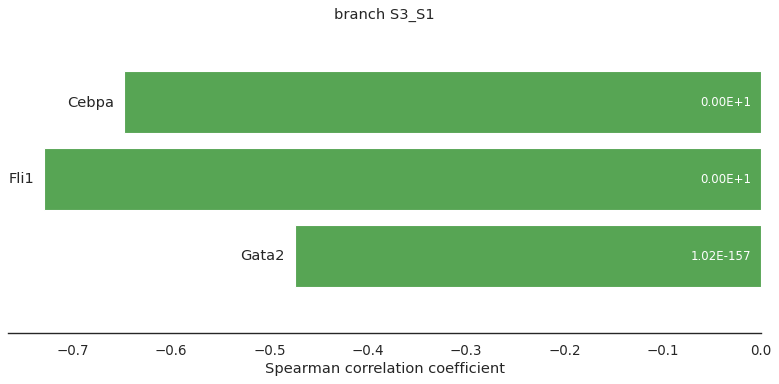

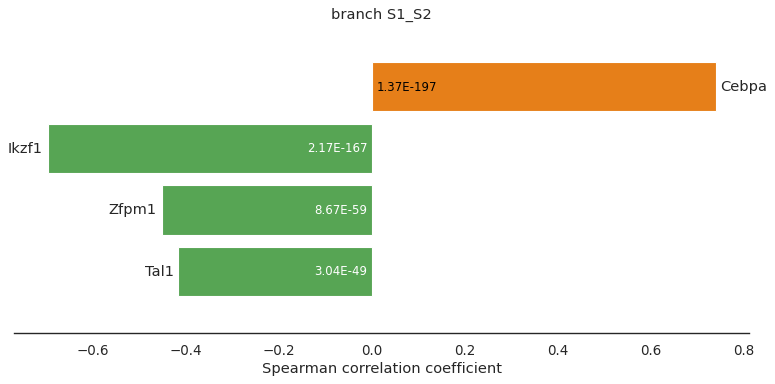

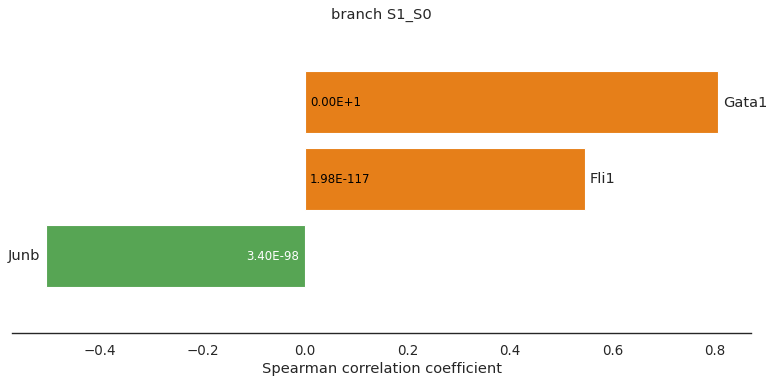

In [31]:
st.plot_transition_markers(adata,fig_size=(10,5))

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [32]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S3',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [33]:
adata.uns['de_markers_greater'].keys()

dict_keys([(('S3', 'S1'), ('S1', 'S2')), (('S3', 'S1'), ('S1', 'S0')), (('S1', 'S2'), ('S1', 'S0'))])

In [34]:
adata.uns['de_markers_greater'][(('S1', 'S2'), ('S1', 'S0'))].head()

z_score          U    logfc   mean_up  mean_down          pval  \
Cebpa  15.821507  1167147.5  0.99987  0.454269   0.226928  2.212247e-56   

               qval  
Cebpa  3.097145e-56

In [35]:
adata.uns['de_markers_less'][(('S1', 'S2'), ('S1', 'S0'))].head()

z_score         U     logfc   mean_up  mean_down           pval  \
Tal1  -36.839586  141954.0  1.249622  0.334873   0.797359  4.297619e-297   
Fli1  -34.544572  186655.0  1.332818  0.281175   0.709341  1.721168e-261   
Ikzf1 -20.019306  469414.0  0.672912  0.439927   0.701787   3.740865e-89   
Gata1 -18.660928  496037.5  0.781395  0.352426   0.606184   1.029780e-77   
Junb  -13.836433  589791.0  0.634462  0.324756   0.504416   1.536980e-43   

                qval  
Tal1   3.008334e-296  
Fli1   6.024090e-261  
Ikzf1   8.728685e-89  
Gata1   1.802116e-77  
Junb    1.793143e-43

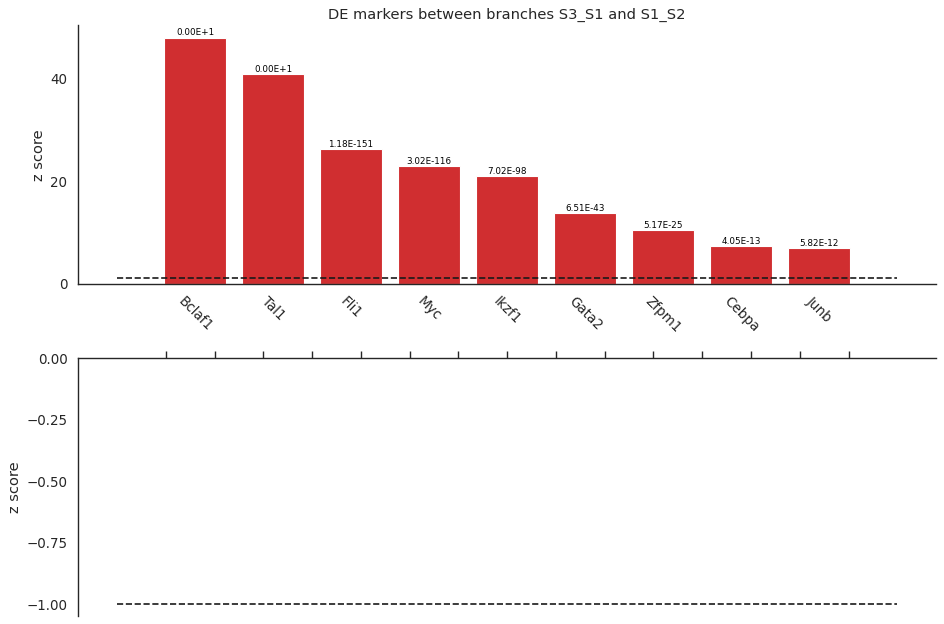

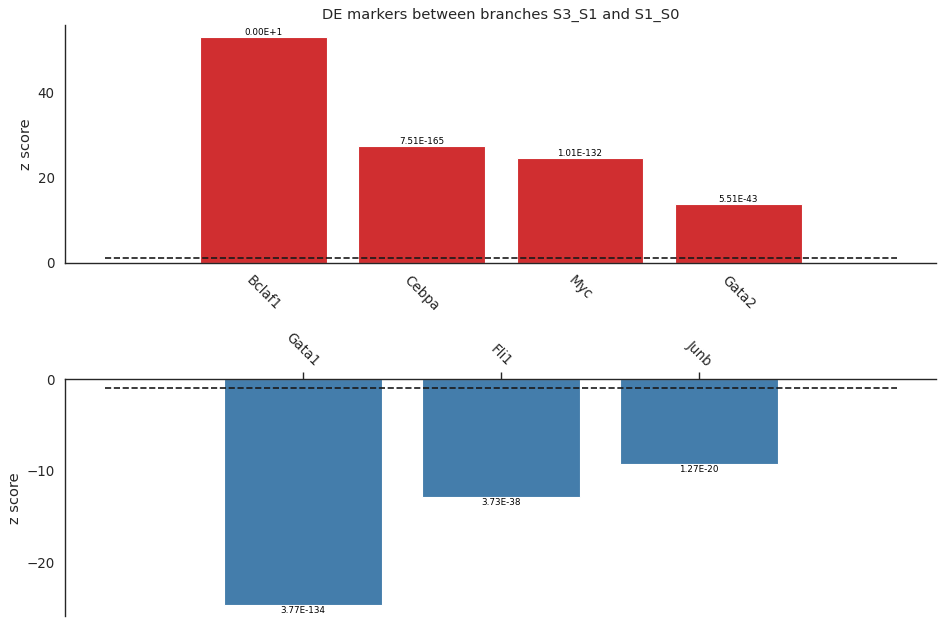

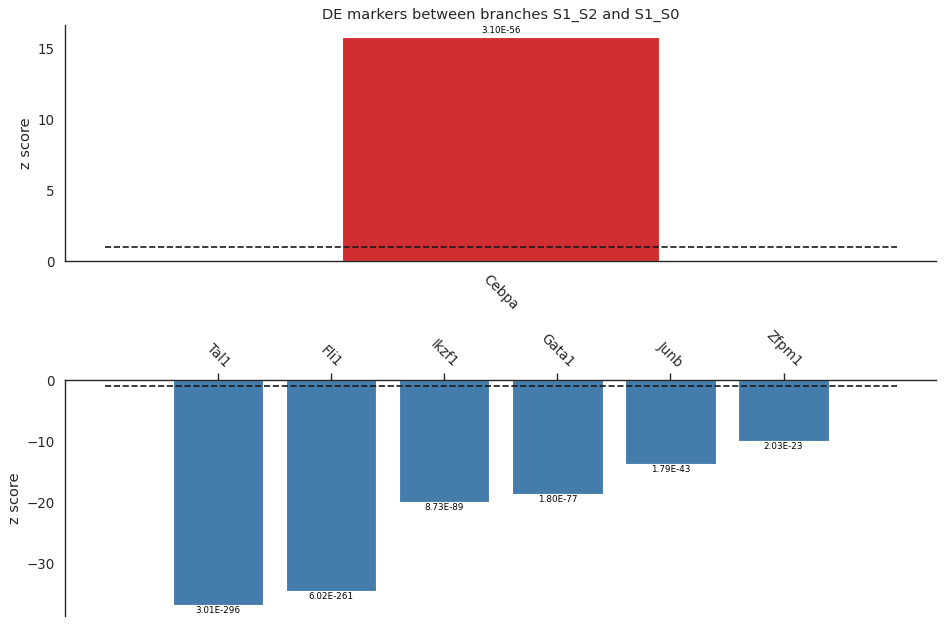

In [36]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

In [37]:
st.detect_markers(
    adata,
    ident='label',
    marker_list=adata.uns['var_genes'],
    cutoff_zscore=1.0,
    cutoff_pvalue=0.01
)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [38]:
adata.uns["markers_label"].keys()

dict_keys(['attractor_pMk', 'attractor_pNeumast', 'branch_pMk', 'branch_pNeumast', 'common', 'split'])

In [39]:
for key in adata.uns["markers_label"].keys():
    print(f"Detected population-specific markers for `{key}`")
    print(f"\t{adata.uns['markers_label'][key].index.to_list()}")

Detected population-specific markers for `attractor_pMk`
	['Fli1', 'Gata1']
Detected population-specific markers for `attractor_pNeumast`
	['Cebpa', 'Tal1', 'Zfpm1']
Detected population-specific markers for `branch_pMk`
	['Junb']
Detected population-specific markers for `branch_pNeumast`
	[]
Detected population-specific markers for `common`
	['Gata2']
Detected population-specific markers for `split`
	['Myc']


#### Save results

In [40]:
st.write(adata,file_name='stream_bifurcation_hematopoiesis.pkl')

To read back the saved `.pkl` file
```python
adata = st.read('./stream_result/stream_result.pkl')
```